Machine Learning Supervised Learning - Classification. There are several models for Classification, I will use Random Forest, K Nearest Neighbors, Logistic Regression, Decision Tree and XG Boost. The data used is Employee Termination Data. It represent fictitious/fake data on terminations. For each of 10 years it show employees that are active and those that terminated. The intent is to see if individual terminations can be predicted from the data provided. The thing to be predicted is status of active or terminated.

# Import Tools

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, f1_score, log_loss, matthews_corrcoef
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Importing necessary tools

# Looking at the Data

In [2]:
data = pd.read_csv('MFG10YearTerminationData.csv')

In [3]:
data.head()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
0,1318,12/31/2006 0:00,1/3/1954,8/28/1989,1/1/1900,52,17,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2006,ACTIVE,HEADOFFICE
1,1318,12/31/2007 0:00,1/3/1954,8/28/1989,1/1/1900,53,18,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2007,ACTIVE,HEADOFFICE
2,1318,12/31/2008 0:00,1/3/1954,8/28/1989,1/1/1900,54,19,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2008,ACTIVE,HEADOFFICE
3,1318,12/31/2009 0:00,1/3/1954,8/28/1989,1/1/1900,55,20,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2009,ACTIVE,HEADOFFICE
4,1318,12/31/2010 0:00,1/3/1954,8/28/1989,1/1/1900,56,21,Vancouver,Executive,CEO,35,M,Male,Not Applicable,Not Applicable,2010,ACTIVE,HEADOFFICE


In [4]:
data.tail()

,EmployeeID,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,gender_full,termreason_desc,termtype_desc,STATUS_YEAR,STATUS,BUSINESS_UNIT
49648,8258,12/1/2015 0:00,5/28/1994,8/19/2013,12/30/2015,21,2,Valemount,Dairy,Dairy Person,34,M,Male,Layoff,Involuntary,2015,TERMINATED,STORES
49649,8264,8/1/2013 0:00,6/13/1994,8/27/2013,8/30/2013,19,0,Vancouver,Customer Service,Cashier,44,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49650,8279,12/1/2015 0:00,7/18/1994,9/15/2013,12/30/2015,21,2,White Rock,Customer Service,Cashier,39,F,Female,Layoff,Involuntary,2015,TERMINATED,STORES
49651,8296,12/1/2013 0:00,9/2/1994,10/9/2013,12/31/2013,19,0,Kelowna,Customer Service,Cashier,16,F,Female,Resignaton,Voluntary,2013,TERMINATED,STORES
49652,8321,12/1/2014 0:00,11/28/1994,11/24/2013,12/30/2014,20,1,Grand Forks,Customer Service,Cashier,13,F,Female,Layoff,Involuntary,2014,TERMINATED,STORES


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 18 columns):
EmployeeID             49653 non-null int64
recorddate_key         49653 non-null object
birthdate_key          49653 non-null object
orighiredate_key       49653 non-null object
terminationdate_key    49653 non-null object
age                    49653 non-null int64
length_of_service      49653 non-null int64
city_name              49653 non-null object
department_name        49653 non-null object
job_title              49653 non-null object
store_name             49653 non-null int64
gender_short           49653 non-null object
gender_full            49653 non-null object
termreason_desc        49653 non-null object
termtype_desc          49653 non-null object
STATUS_YEAR            49653 non-null int64
STATUS                 49653 non-null object
BUSINESS_UNIT          49653 non-null object
dtypes: int64(5), object(13)
memory usage: 6.8+ MB


Looking at the data, first there is no NaN value. There are several columns already in Integer type but some columns that represent dates still considered as object type. The categorical values type is object. So there are 5 numerical columns, 4 date columns and 9 categorical columns.

In [6]:
data.describe()

,EmployeeID,age,length_of_service,store_name,STATUS_YEAR
count,49653.000000,49653.000000,49653.000000,49653.000000,49653.000000
mean,4859.495740,42.077035,10.434596,27.297605,2010.612612
std,1826.571142,12.427257,6.325286,13.514134,2.845577
min,1318.000000,19.000000,0.000000,1.000000,2006.000000
25%,3360.000000,31.000000,5.000000,16.000000,2008.000000
50%,5031.000000,42.000000,10.000000,28.000000,2011.000000
75%,6335.000000,53.000000,15.000000,42.000000,2013.000000
max,8336.000000,65.000000,26.000000,46.000000,2015.000000


* EmployeeID column is the ID number for each employee. I will drop this column or feature because it will not affect the classification model.
* Age is the employee age in the data. I will explore it more and use this feature to build the model.
* length_of_service represents the year of service of employee in the company. I will explore it more and use this feature to build the model.
* store_name values are in number or numerical because it masked the real store name as number. I will use this feature to build the model.
* STATUS_YEAR is the year of termination or active status (STATUS feature) issued. I will drop this feature.

In [7]:
data.describe(exclude='number')

,recorddate_key,birthdate_key,orighiredate_key,terminationdate_key,city_name,department_name,job_title,gender_short,gender_full,termreason_desc,termtype_desc,STATUS,BUSINESS_UNIT
count,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653,49653
unique,130,5342,4415,1055,40,21,47,2,2,4,3,2,2
top,12/31/2013 0:00,4/27/1956,10/16/2005,1/1/1900,Vancouver,Meats,Meat Cutter,F,Female,Not Applicable,Not Applicable,ACTIVE,STORES
freq,5215,40,50,42450,11211,10269,9984,25898,25898,48168,48168,48168,49068


* recorddate_key is the date of the employee data added to this data. I will drop this because it will be irrelevant to the classification model (employee terminated or not).
* birthdate_key is the birth date of the employee. I will drop this because age feature is already available.
* orighiredate_key is the date of when the employee is hired. I will drop this because length_of_service feature is available.
* terminationdate_key is the date of the employee terminated. I will drop this because it will be irrelevant to the classification model (employee terminated or not).
* city_name is the place of work for the employee. I will explore this further and use this feature for the model.
* department_name is the department where the employee work. I will explore this further and use this feature for the model.
* job_title is the employee assigned job. I will explore this further and use this feature for the model.
* gender_short is the employee's gender in short. I will explore this further and use this feature for the model.
* gender_full is the employee's gender. I will drop this because gender_short is available and represents the same values.
* termreason_desc is the reason of why employee is terminated. I will drop this because it will be irrelevant to the model because the values I see are Resigned and Layoff which don't really lead to the cause of termination.
* termtype_desc is the type of termination. I will drop this because it will be irrelevant to the model.
* STATUS is the status of the employee. Either Active or Terminated. I will use this as Label.
* BUSINESS_UNIT is the employee unit placement. I will explore this more and use this as feature for the model.

# Drop Unnecessary Columns

In [8]:
dropped = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key', 
           'terminationdate_key', 'gender_full', 'termreason_desc', 'termtype_desc', 'STATUS_YEAR']

Dropping features not used for the classification model.

In [9]:
df = data.drop(dropped,axis=1)

In [10]:
df.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS,BUSINESS_UNIT
0,52,17,Vancouver,Executive,CEO,35,M,ACTIVE,HEADOFFICE
1,53,18,Vancouver,Executive,CEO,35,M,ACTIVE,HEADOFFICE
2,54,19,Vancouver,Executive,CEO,35,M,ACTIVE,HEADOFFICE
3,55,20,Vancouver,Executive,CEO,35,M,ACTIVE,HEADOFFICE
4,56,21,Vancouver,Executive,CEO,35,M,ACTIVE,HEADOFFICE


# Explore Data

## Age

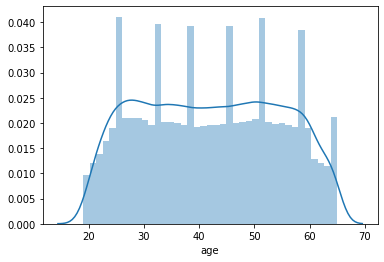

In [11]:
sns.distplot(df['age'])

The majority of employees age is in range of mid 20s to late 50s. I also see that employee is hired until 65 years of age before retiring.

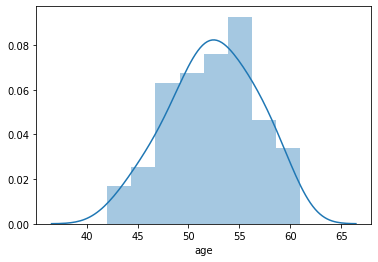

In [12]:
sns.distplot(df[df['department_name']=='Executive']['age'])

For Executives, the age range starts from early 40s to 60 years of age. The Executive positions I believed were acquired by employees with years of experience.

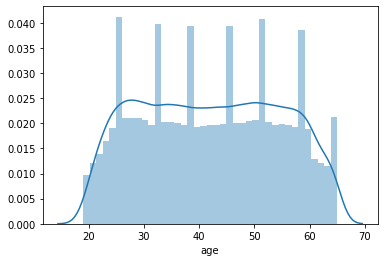

In [13]:
sns.distplot(df[df['department_name']!='Executive']['age'])

Outside of Executives, the distribution plot shows that it is similar to the all employees distribution plot.

## Length of Service

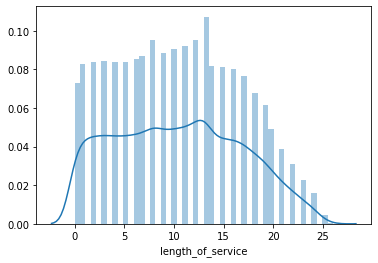

In [14]:
sns.distplot(df['length_of_service'])

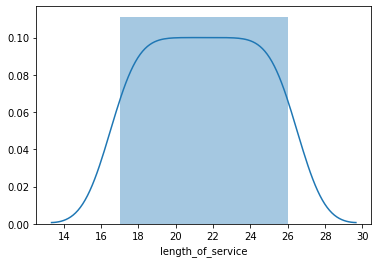

In [15]:
sns.distplot(df[df['department_name']=='Executive']['length_of_service'])

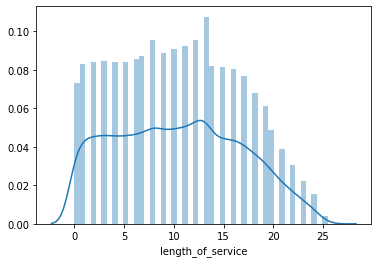

In [16]:
sns.distplot(df[df['department_name']!='Executive']['length_of_service'])

Length of service ranged from 0 years to 26 years. Interestingly, for executives the length of service start from 17 years of service up to 26 years. So it seems that employees need many years of experience (minimum 17 years) to reach executive positions. Outside of executives, the distribution plot is similar to all employees distribution plot.

## City

In [17]:
df[df['department_name']=='Executive']['city_name'].value_counts()

Vancouver    100
Name: city_name, dtype: int64

All Executives are located in Vancouver. Let's see where the head office is. (Should be Vancouver too)

In [18]:
df[df['BUSINESS_UNIT']=='HEADOFFICE']['city_name'].value_counts()

Vancouver    585
Name: city_name, dtype: int64

All the employees assigned to the head office are all located in Vancouver.

In [19]:
df['city_name'].value_counts()

Vancouver           11211
Victoria             4885
Nanaimo              3876
New Westminster      3211
Kelowna              2513
Burnaby              2067
Kamloops             2061
Prince George        2048
Cranbrook            1785
Surrey               1560
Richmond             1401
Terrace              1228
Chilliwack           1167
Trail                 925
Langley               901
Vernon                898
Squamish              806
Quesnel               703
Abbotsford            681
North Vancouver       648
Fort St John          621
Williams Lake         617
West Vancouver        613
Port Coquitlam        545
Aldergrove            520
Fort Nelson           322
Nelson                317
New Westminister      254
Grand Forks           236
White Rock            231
Haney                 182
Princeton             136
Dawson Creek          129
Bella Bella           126
Ocean Falls            65
Pitt Meadows           57
Cortes Island          43
Valemount              37
Dease Lake  

It seems that all the business location for this company are all located in the western side of Canada. With British Columbia state as the main state for this company operation.

## Department Name

In [20]:
df['department_name'].value_counts()

Meats                     10269
Dairy                      8599
Produce                    8515
Bakery                     8381
Customer Service           7122
Processed Foods            5911
Store Management            271
Executive                   100
Recruitment                  72
HR Technology                64
Accounting                   59
Employee Records             44
Accounts Receiveable         39
Labor Relations              34
Accounts Payable             34
Training                     30
Investment                   24
Audit                        24
Compensation                 24
Information Technology       20
Legal                        17
Name: department_name, dtype: int64

In [21]:
sum(df['department_name'].value_counts().values[:7])/sum(df['department_name'].value_counts().values)*100

98.82182345477615

This company needs a lot of employees for their stores business unit. 98 percent of employees are placed for the stores. The Top 4 department with the most employees are fresh goods employee. I think the degree of difficulty of handling fresh goods caused the need of quantity for these departments.

In [22]:
df[df['city_name']!='Vancouver']['department_name'].value_counts()

Meats               8012
Dairy               7189
Produce             7117
Bakery              6824
Customer Service    4778
Processed Foods     4291
Store Management     231
Name: department_name, dtype: int64

In [23]:
sum(df[df['city_name']!='Vancouver']['department_name'].value_counts().values)/sum(df['department_name'].value_counts().values[:7])*100

78.34433846906335

Employees outside of Vancouver are all Stores employees. 78 percent of stores employees located outside of Vancouver

## Job

In [24]:
df['job_title'].value_counts()

Meat Cutter                        9984
Dairy Person                       8590
Produce Clerk                      8237
Baker                              8096
Cashier                            6816
Shelf Stocker                      5622
Customer Service Manager            306
Processed Foods Manager             289
Bakery Manager                      285
Meats Manager                       285
Produce Manager                     278
Store Manager                       271
Recruiter                            62
HRIS Analyst                         55
Accounting Clerk                     50
Benefits Admin                       35
Labor Relations Analyst              30
Accounts Receiveable Clerk           30
Trainer                              26
Accounts Payable Clerk               25
Compensation Analyst                 20
Systems Analyst                      20
Auditor                              20
Investment Analyst                   20
Corporate Lawyer                     17


In [25]:
df[df['BUSINESS_UNIT']=='STORES']['job_title'].value_counts()

Meat Cutter                 9984
Dairy Person                8590
Produce Clerk               8237
Baker                       8096
Cashier                     6816
Shelf Stocker               5622
Customer Service Manager     306
Processed Foods Manager      289
Meats Manager                285
Bakery Manager               285
Produce Manager              278
Store Manager                271
Dairy Manager                  9
Name: job_title, dtype: int64

In [26]:
df[df['BUSINESS_UNIT']=='HEADOFFICE']['job_title'].value_counts()

Recruiter                          62
HRIS Analyst                       55
Accounting Clerk                   50
Benefits Admin                     35
Accounts Receiveable Clerk         30
Labor Relations Analyst            30
Trainer                            26
Accounts Payable Clerk             25
Compensation Analyst               20
Investment Analyst                 20
Systems Analyst                    20
Auditor                            20
Corporate Lawyer                   17
VP Human Resources                 10
CEO                                10
Director, Recruitment              10
Exec Assistant, Finance            10
CHief Information Officer          10
VP Stores                          10
VP Finance                         10
Exec Assistant, Human Resources    10
Exec Assistant, VP Stores          10
Exec Assistant, Legal Counsel      10
Legal Counsel                      10
Director, Employee Records          9
Director, Accounts Payable          9
Director, HR

In [27]:
df[df['department_name']=='Executive']['job_title'].value_counts()

VP Finance                         10
Exec Assistant, Finance            10
CHief Information Officer          10
Legal Counsel                      10
VP Stores                          10
CEO                                10
Exec Assistant, Legal Counsel      10
VP Human Resources                 10
Exec Assistant, VP Stores          10
Exec Assistant, Human Resources    10
Name: job_title, dtype: int64

We can see the job titles for each units. Also the job titles that are considered as Executives. It seems that the number of employees for the head office unit follow a certain quota for each job title. For the stores unit, I believe the number follow the quantity needs of the store.

## Gender

In [28]:
df[(df['department_name'] == 'Executive')]['gender_short'].value_counts()

M    50
F    50
Name: gender_short, dtype: int64

The Executive gender is half male and half female.

In [29]:
df[(df['BUSINESS_UNIT'] == 'STORES')]['gender_short'].value_counts()

F    25502
M    23566
Name: gender_short, dtype: int64

The number of females and males are almost similar for stores employees. Female is a little bit higher.

In [30]:
df[(df['BUSINESS_UNIT'] == 'HEADOFFICE')]['gender_short'].value_counts()

F    396
M    189
Name: gender_short, dtype: int64

The number of female employees doubles the male employees in the head office. 

## Business Unit

In [31]:
df['BUSINESS_UNIT'].value_counts()

STORES        49068
HEADOFFICE      585
Name: BUSINESS_UNIT, dtype: int64

98 percent of employees are placed for the store units.

# Transforming Categorical Columns

to use the classification models, all the columns or features must be in number or integer form. I will use LabelEncoder to transform the categorical columns to numerical columns.

In [32]:
le = preprocessing.LabelEncoder()
le.fit(list(df['city_name'].unique()))
df['city_name'] = le.transform(df['city_name'])
le.fit(list(df['department_name'].unique()))
df['department_name'] = le.transform(df['department_name'])
le.fit(list(df['job_title'].unique()))
df['job_title'] = le.transform(df['job_title'])
le.fit(list(df['gender_short'].unique()))
df['gender_short'] = le.transform(df['gender_short'])
le.fit(list(df['BUSINESS_UNIT'].unique()))
df['BUSINESS_UNIT'] = le.transform(df['BUSINESS_UNIT'])

In [33]:
df.head()

,age,length_of_service,city_name,department_name,job_title,store_name,gender_short,STATUS,BUSINESS_UNIT
0,52,17,34,9,7,35,1,ACTIVE,0
1,53,18,34,9,7,35,1,ACTIVE,0
2,54,19,34,9,7,35,1,ACTIVE,0
3,55,20,34,9,7,35,1,ACTIVE,0
4,56,21,34,9,7,35,1,ACTIVE,0


# Classification Models

In [11]:
label = df['STATUS']
df = df.drop('STATUS',axis=1)

Using Status column as Label

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3,
                                                    random_state=10)

Splitting the data, 70 percent of the data for training models and 30 percent for testing models.

## Random Forest

I use Random Forest as a test model to see whether I want to use an oversampling or not for this data.

In [16]:
rfc = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2,
                               oob_score=False, random_state=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [17]:
def calc_train_error(X_train, y_train, model):
    model.fit(X_train, y_train)
    predictions = model.predict(X_train)
    predictProba = model.predict_proba(X_train)
    matt = matthews_corrcoef(y_train, predictions)
    f1 = f1_score(y_train, predictions, average ='macro')
    report = classification_report(y_train, predictions)
    roc_auc = roc_auc_score(y_train, predictProba[:, 1])
    accuracy = accuracy_score(y_train, predictions)
    confMatrix = confusion_matrix(y_train, predictions)
    logloss = log_loss(y_train,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

def calc_validation_error(X_test, y_test, model):
    model.fit(X_test, y_test)
    predictions = model.predict(X_test)
    predictProba = model.predict_proba(X_test)
    matt = matthews_corrcoef(y_test, predictions)
    f1 = f1_score(y_test, predictions, average ='macro')
    report = classification_report(y_test, predictions)
    roc_auc = roc_auc_score(y_test, predictProba[:, 1])
    accuracy = accuracy_score(y_test, predictions)
    confMatrix = confusion_matrix(y_test, predictions)
    logloss = log_loss(y_test,predictProba)
    return{
        'report' : report, 
        'matthew' : matt,
        'f1' : f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'confusion': confMatrix,
        'logloss' : logloss
    }

In [18]:
calc_train_error(X_train, y_train, rfc)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.99      1.00      1.00     33713\n  TERMINATED       0.96      0.78      0.86      1044\n\n    accuracy                           0.99     34757\n   macro avg       0.98      0.89      0.93     34757\nweighted avg       0.99      0.99      0.99     34757\n',
 'matthew': 0.8581828837584314,
 'f1': 0.9265750959084688,
 'roc': 0.9976669754484924,
 'accuracy': 0.9922317806485025,
 'confusion': array([[33677,    36],
        [  234,   810]], dtype=int64),
 'logloss': 0.019484091287268253}

In [19]:
calc_validation_error(X_test, y_test, rfc)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.99      1.00      1.00     14455\n  TERMINATED       0.96      0.81      0.88       441\n\n    accuracy                           0.99     14896\n   macro avg       0.98      0.90      0.94     14896\nweighted avg       0.99      0.99      0.99     14896\n',
 'matthew': 0.8768717818365188,
 'f1': 0.9366983175079127,
 'roc': 0.9988003272333954,
 'accuracy': 0.9932867883995704,
 'confusion': array([[14440,    15],
        [   85,   356]], dtype=int64),
 'logloss': 0.016396865136338652}

In [24]:
sm = SMOTE(sampling_strategy = 'minority')

oversampled_trainX, oversampled_trainY = sm.fit_sample(X_train,y_train)
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)

oversampled_testX, oversampled_testY = sm.fit_sample(X_test,y_test)
oversampled_test = pd.concat([pd.DataFrame(oversampled_testY), pd.DataFrame(oversampled_testX)], axis=1)

In [25]:
rfc = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2,
                               oob_score=False, random_state=10)
rfc.fit(oversampled_trainX, oversampled_trainY)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [26]:
calc_train_error(oversampled_trainX, oversampled_trainY, rfc)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.98      0.97      0.97     33713\n  TERMINATED       0.97      0.98      0.97     33713\n\n    accuracy                           0.97     67426\n   macro avg       0.97      0.97      0.97     67426\nweighted avg       0.97      0.97      0.97     67426\n',
 'matthew': 0.9481771282880576,
 'f1': 0.9740139685284064,
 'roc': 0.9974969979073874,
 'accuracy': 0.9740159582356954,
 'confusion': array([[32542,  1171],
        [  581, 33132]], dtype=int64),
 'logloss': 0.0620956611133005}

In [27]:
calc_validation_error(oversampled_testX, oversampled_testY, rfc)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.99      0.98      0.98     14455\n  TERMINATED       0.98      0.99      0.98     14455\n\n    accuracy                           0.98     28910\n   macro avg       0.98      0.98      0.98     28910\nweighted avg       0.98      0.98      0.98     28910\n',
 'matthew': 0.9665565153280986,
 'f1': 0.9832228527552778,
 'roc': 0.9987105894424675,
 'accuracy': 0.9832237979937738,
 'confusion': array([[14104,   351],
        [  134, 14321]], dtype=int64),
 'logloss': 0.045132222502926804}

I will use Oversampled data to make the models because I believe that the model with oversampled data is better score by looking at the Matthew Correlation Coefficient, F1-score and ROC-AUC score.

## K Nearest Neighbors

In [28]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn.fit(oversampled_trainX, oversampled_trainY)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [29]:
calc_train_error(oversampled_trainX, oversampled_trainY, knn)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.97      0.95      0.96     33713\n  TERMINATED       0.95      0.97      0.96     33713\n\n    accuracy                           0.96     67426\n   macro avg       0.96      0.96      0.96     67426\nweighted avg       0.96      0.96      0.96     67426\n',
 'matthew': 0.9200815682994474,
 'f1': 0.9598440572418092,
 'roc': 0.9907824573331185,
 'accuracy': 0.9598522825022988,
 'confusion': array([[31877,  1836],
        [  871, 32842]], dtype=int64),
 'logloss': 0.25000745980995903}

In [30]:
calc_validation_error(oversampled_testX, oversampled_testY, knn)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.98      0.95      0.96     14455\n  TERMINATED       0.95      0.98      0.97     14455\n\n    accuracy                           0.97     28910\n   macro avg       0.97      0.97      0.97     28910\nweighted avg       0.97      0.97      0.97     28910\n',
 'matthew': 0.9315751201942406,
 'f1': 0.9654676415292198,
 'roc': 0.9938187466416427,
 'accuracy': 0.9654790729851263,
 'confusion': array([[13693,   762],
        [  236, 14219]], dtype=int64),
 'logloss': 0.1732810844753947}

## Logistic Regression

In [32]:
log_model = LogisticRegression(random_state=10)
log_model.fit(oversampled_trainX, oversampled_trainY)

C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=10, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
calc_train_error(oversampled_trainX, oversampled_trainY, log_model)

C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.65      0.81      0.72     33713\n  TERMINATED       0.75      0.56      0.64     33713\n\n    accuracy                           0.69     67426\n   macro avg       0.70      0.69      0.68     67426\nweighted avg       0.70      0.69      0.68     67426\n',
 'matthew': 0.38744855739650724,
 'f1': 0.6826870809998865,
 'roc': 0.7675589884535814,
 'accuracy': 0.6876130869397562,
 'confusion': array([[27382,  6331],
        [14732, 18981]], dtype=int64),
 'logloss': 0.5476054047040858}

In [34]:
calc_validation_error(oversampled_testX, oversampled_testY, log_model)

C:\Users\Nicholas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.68      0.78      0.73     14455\n  TERMINATED       0.75      0.64      0.69     14455\n\n    accuracy                           0.71     28910\n   macro avg       0.72      0.71      0.71     28910\nweighted avg       0.72      0.71      0.71     28910\n',
 'matthew': 0.4262010703512168,
 'f1': 0.7092839749933189,
 'roc': 0.7929056252416133,
 'accuracy': 0.710826703562781,
 'confusion': array([[11328,  3127],
        [ 5233,  9222]], dtype=int64),
 'logloss': 0.5338258764051081}

## Decision Tree

In [37]:
dtree = DecisionTreeClassifier(random_state = 10)
dtree.fit(oversampled_trainX, oversampled_trainY)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [38]:
calc_train_error(oversampled_trainX, oversampled_trainY, dtree)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.98      0.97      0.97     33713\n  TERMINATED       0.97      0.98      0.97     33713\n\n    accuracy                           0.97     67426\n   macro avg       0.97      0.97      0.97     67426\nweighted avg       0.97      0.97      0.97     67426\n',
 'matthew': 0.9489396479219274,
 'f1': 0.9744301883662874,
 'roc': 0.9978272324719825,
 'accuracy': 0.9744312283095542,
 'confusion': array([[32636,  1077],
        [  647, 33066]], dtype=int64),
 'logloss': 0.05601329042896898}

In [39]:
calc_validation_error(oversampled_testX, oversampled_testY, dtree)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.99      0.98      0.98     14455\n  TERMINATED       0.98      0.99      0.98     14455\n\n    accuracy                           0.98     28910\n   macro avg       0.98      0.98      0.98     28910\nweighted avg       0.98      0.98      0.98     28910\n',
 'matthew': 0.9676703522717055,
 'f1': 0.9838114392557888,
 'roc': 0.9990391942646707,
 'accuracy': 0.9838118298166725,
 'confusion': array([[14150,   305],
        [  163, 14292]], dtype=int64),
 'logloss': 0.03590492684849168}

## XGBoost

In [40]:
xgb = XGBClassifier(random_state=101)
xgb.fit(oversampled_trainX, oversampled_trainY)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=101, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [41]:
calc_train_error(oversampled_trainX, oversampled_trainY, xgb)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.95      0.95      0.95     33713\n  TERMINATED       0.95      0.95      0.95     33713\n\n    accuracy                           0.95     67426\n   macro avg       0.95      0.95      0.95     67426\nweighted avg       0.95      0.95      0.95     67426\n',
 'matthew': 0.9069831806601422,
 'f1': 0.9534896574439911,
 'roc': 0.9918976095447005,
 'accuracy': 0.9534897517278201,
 'confusion': array([[32193,  1520],
        [ 1616, 32097]], dtype=int64),
 'logloss': 0.12305359251714441}

In [42]:
calc_validation_error(oversampled_testX, oversampled_testY, xgb)

{'report': '              precision    recall  f1-score   support\n\n      ACTIVE       0.98      0.97      0.97     14455\n  TERMINATED       0.97      0.98      0.97     14455\n\n    accuracy                           0.97     28910\n   macro avg       0.97      0.97      0.97     28910\nweighted avg       0.97      0.97      0.97     28910\n',
 'matthew': 0.9424969493431483,
 'f1': 0.9712201927912252,
 'roc': 0.9965244707360634,
 'accuracy': 0.9712210307851954,
 'confusion': array([[13961,   494],
        [  338, 14117]], dtype=int64),
 'logloss': 0.08387684755991875}

## Conclusion
It seems that the best model is Decision Tree for this data to predict employees termination. This is how I see and choose the best model to use for classification.